In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
# Here both the date & date_month_year columns are in object;we should convert it into datetime object
df['Date']=pd.to_datetime(df['Date'])
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

In [6]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
#For monthly leves create a new column for month
df['month']=df['Date'].dt.month_name()
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,April
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June
2221,331188,complaint about comcast,2015-06-09,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,June
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June


In [7]:
#Number of complaints each date
df['Date'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

In [8]:
dates=df.groupby('Date').size()
dates

Date
2015-04-01    18
2015-04-02    27
2015-04-03    15
2015-04-04    12
2015-04-05     6
              ..
2015-06-26    55
2015-06-27    39
2015-06-28    27
2015-06-29    51
2015-06-30    53
Length: 91, dtype: int64

In [9]:
daily=pd.DataFrame(dates)
daily

,0
Date,
2015-04-01,18
2015-04-02,27
2015-04-03,15
2015-04-04,12
2015-04-05,6
...,...
2015-06-26,55
2015-06-27,39
2015-06-28,27


In [10]:
daily=pd.DataFrame(dates).reset_index()
daily=daily.rename(columns={0:'count'})
daily

,Date,count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


<AxesSubplot:xlabel='Date'>

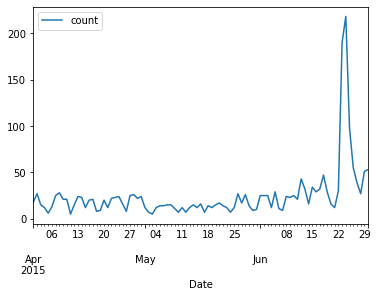

In [11]:
daily.plot(x='Date',y='count',kind='line')

In [12]:
month=df.groupby('month').size()
month

month
April     545
June     1280
May       399
dtype: int64

In [13]:
month=pd.DataFrame(month).reset_index()
month=month.rename(columns={0:'count'})
month

,month,count
0,April,545
1,June,1280
2,May,399


<AxesSubplot:xlabel='month'>

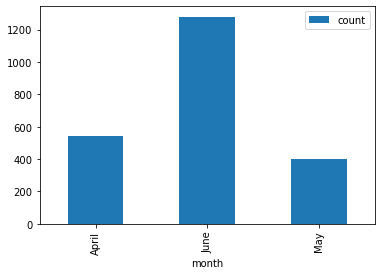

In [14]:
month.plot(x='month',y='count',kind='bar')

In [15]:
# Provide a table with the frequency of complaint types.
df['Customer Complaint'].value_counts()
#similar labels such as Comcast,comcast,comcast billing etc.,

Comcast                                                                  83
Comcast Internet                                                         18
Comcast Data Cap                                                         17
comcast                                                                  13
Comcast Billing                                                          11
                                                                         ..
Ridiculous Charges                                                        1
Issue with internet service                                               1
Comcast Over Charges with No Notification                                 1
Comcast blocking HBOGO on Playstation 4 Consoles                          1
Comcast Charging Service Fee To Customer--Customer Didn't Cause Issue     1
Name: Customer Complaint, Length: 1841, dtype: int64

In [16]:
# Therefore applying NLP
df['Customer Complaint']=df['Customer Complaint'].apply(lambda x:x.title())
df['Customer Complaint'].value_counts()

Comcast                                                              102
Comcast Data Cap                                                      30
Comcast Internet                                                      29
Comcast Data Caps                                                     21
Comcast Billing                                                       18
                                                                    ... 
Cramming, False Internet Promotion, Speed Complaint                    1
Difficulty With Internet Speeds                                        1
Failure To Cancel Service                                              1
Comcast Data Usage - Additional Fee For Internet Usage But Not Tv      1
Lack Of Reasonable Infrastructure Close To Town                        1
Name: Customer Complaint, Length: 1740, dtype: int64

<AxesSubplot:>

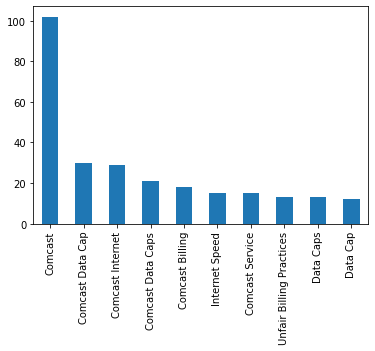

In [17]:
df['Customer Complaint'].value_counts()[:10].plot.bar()

In [18]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains
internet_issues1=df[df['Customer Complaint'].str.contains('Network')].count()
internet_issues2=df[df['Customer Complaint'].str.contains('Speed')].count()
internet_issues3=df[df['Customer Complaint'].str.contains('Internet')].count()
total=internet_issues1+internet_issues2+internet_issues3
total

Ticket #                       725
Customer Complaint             725
Date                           725
Date_month_year                725
Time                           725
Received Via                   725
City                           725
State                          725
Zip code                       725
Status                         725
Filing on Behalf of Someone    725
month                          725
dtype: int64

In [19]:
billing_issues1=df[df['Customer Complaint'].str.contains('Billing')].count()
billing_issues2=df[df['Customer Complaint'].str.contains('Charges')].count()
total_billing=billing_issues1+billing_issues2
total_billing

Ticket #                       365
Customer Complaint             365
Date                           365
Date_month_year                365
Time                           365
Received Via                   365
City                           365
State                          365
Zip code                       365
Status                         365
Filing on Behalf of Someone    365
month                          365
dtype: int64

In [20]:
service_issues1=df[df['Customer Complaint'].str.contains('Service')].count()
service_issues2=df[df['Customer Complaint'].str.contains('Customer')].count()
total_service=service_issues1+service_issues2
total_service

Ticket #                       584
Customer Complaint             584
Date                           584
Date_month_year                584
Time                           584
Received Via                   584
City                           584
State                          584
Zip code                       584
Status                         584
Filing on Behalf of Someone    584
month                          584
dtype: int64

In [21]:
other_issues=2224-(total+total_billing+total_service)
other_issues

Ticket #                       550
Customer Complaint             550
Date                           550
Date_month_year                550
Time                           550
Received Via                   550
City                           550
State                          550
Zip code                       550
Status                         550
Filing on Behalf of Someone    550
month                          550
dtype: int64

In [22]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [23]:
df['New_Status']=['open' if x=='Open' or x=='Pending' else 'Closed' for x in df['Status'] ]

In [24]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,New_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment Disappear - Service Got Disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed And Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,open
4,307175,Comcast Not Working And No Service To Boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [27]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
state_complaint=df.groupby(['State','New_Status']).size()
state_complaint

State          New_Status
Alabama        Closed        17
               open           9
Arizona        Closed        14
               open           6
Arkansas       Closed         6
                             ..
Virginia       open          11
Washington     Closed        75
               open          23
West Virginia  Closed         8
               open           3
Length: 77, dtype: int64

In [28]:
#Lets make it in more readable form
state_complaint=df.groupby(['State','New_Status']).size().unstack()
state_complaint

New_Status,Closed,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [30]:
state_complaint=df.groupby(['State','New_Status']).size().unstack().fillna(0)
state_complaint

New_Status,Closed,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

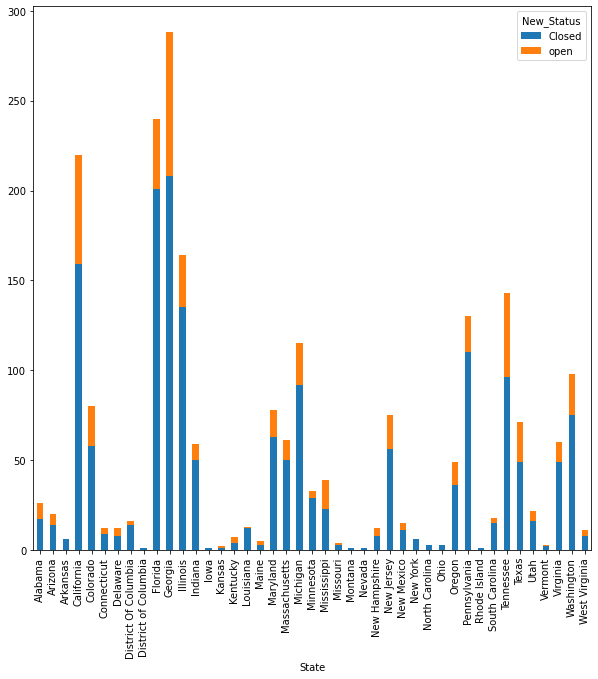

In [32]:
state_complaint.plot.bar(stacked=True,figsize=(10,10))

In [33]:
#Which state has the maximum complaints
df['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
Connecticut              12
New Hampshire            12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
Ohio                      3
North Carolina      

In [36]:
#Which state has the highest percentage of unresolved complaints
#Inorder to get the unresolved data we will sort the open column in descending order
unresolved_data=df.groupby(['State','New_Status']).size().unstack().fillna(0).sort_values(by='open',ascending=False)
unresolved_data

New_Status,Closed,open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [39]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
unresolved_data['unresolved_cmp_perc']=np.round(unresolved_data['open']/unresolved_data['open'].sum()*100,2)
unresolved_data


New_Status,Closed,open,unresolved_cmp_perc
State,,,
Georgia,208.0,80.0,15.47
California,159.0,61.0,11.80
Tennessee,96.0,47.0,9.09
Florida,201.0,39.0,7.54
Illinois,135.0,29.0,5.61
Washington,75.0,23.0,4.45
Michigan,92.0,23.0,4.45
Colorado,58.0,22.0,4.26
Texas,49.0,22.0,4.26


In [40]:
resolved_data=df.groupby(['Received Via','New_Status']).size().unstack()
resolved_data

New_Status,Closed,open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [41]:
resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64